In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV, train_test_split, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [60]:
data = pd.read_csv('./Data/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [62]:
data.replace({'thall': 0}, np.nan, inplace=True)
data.fillna({'thall': 2}, inplace=True)

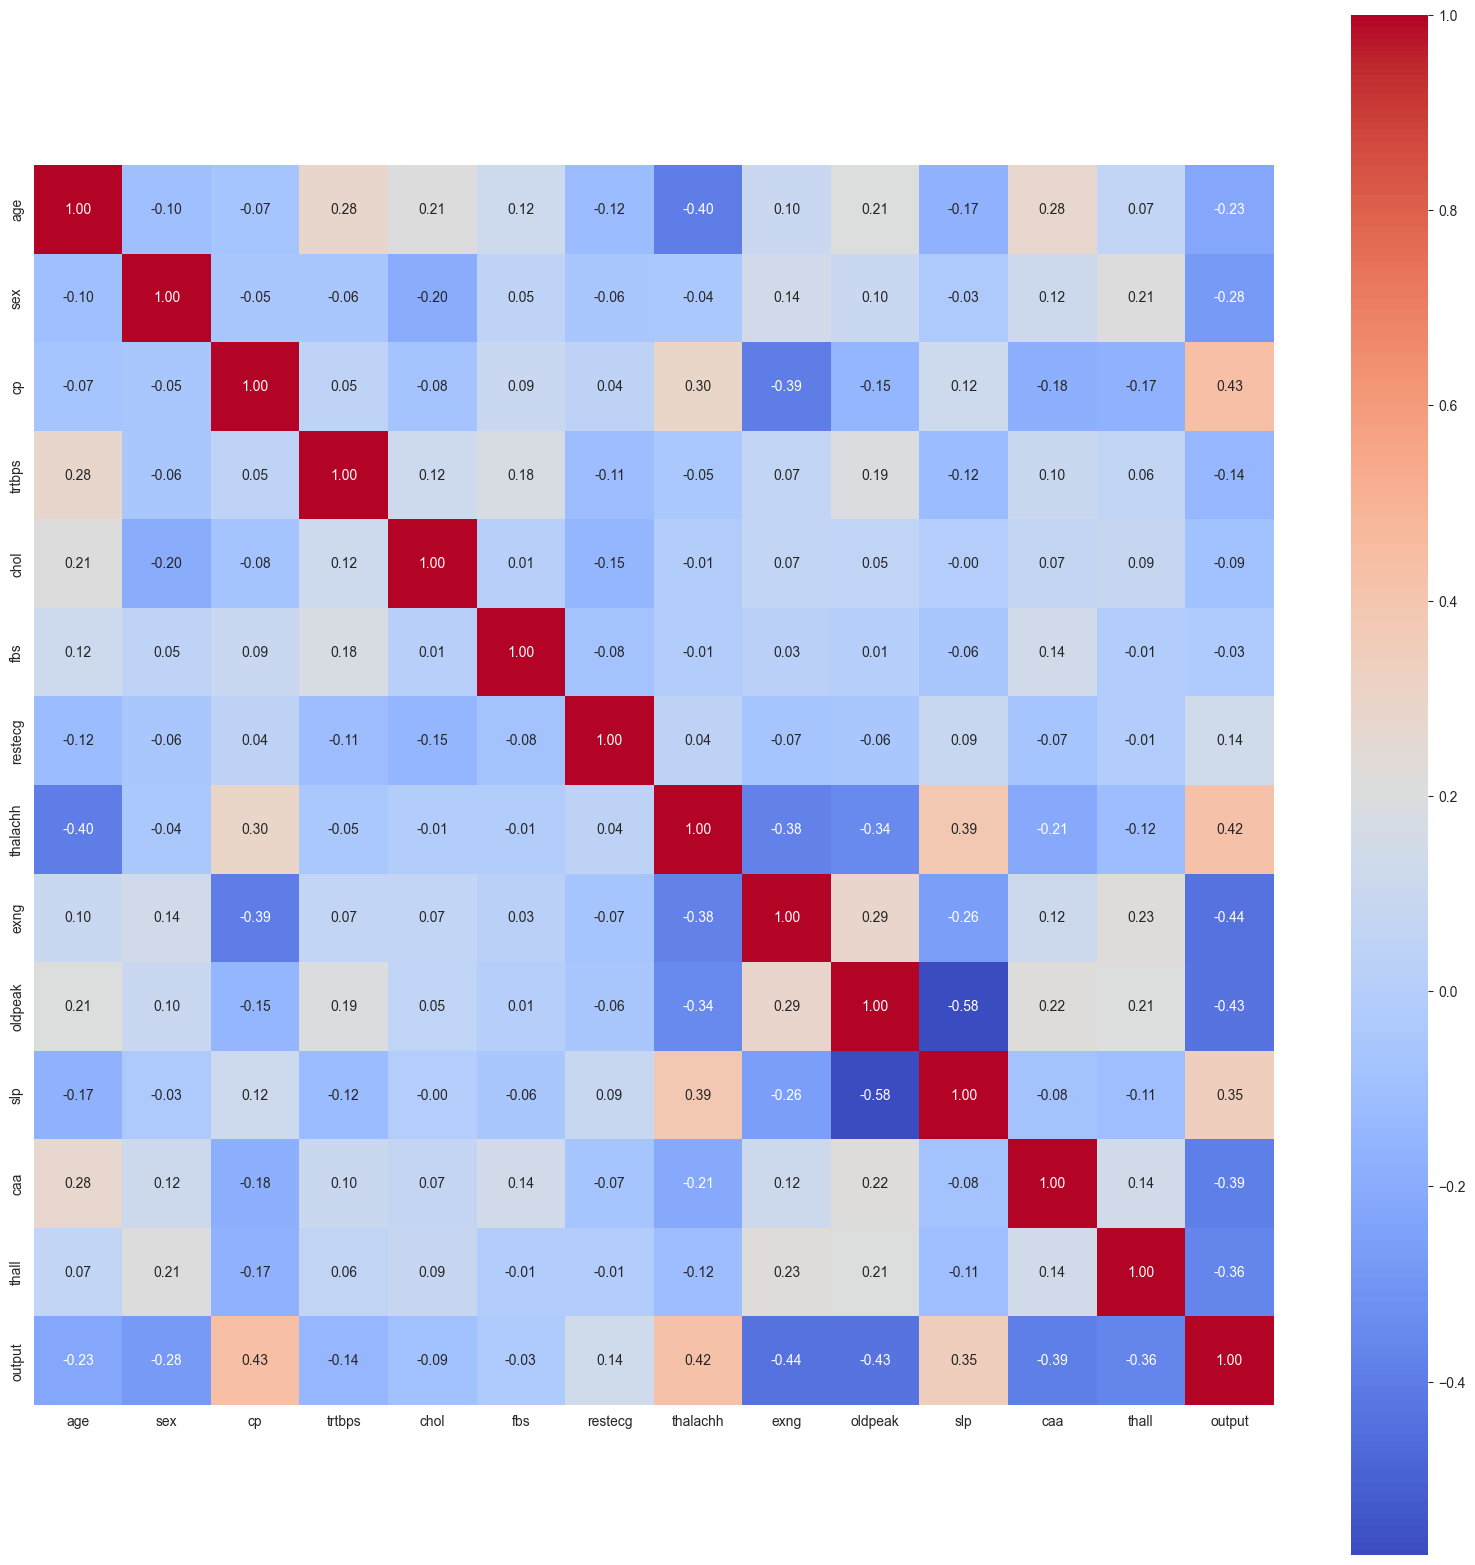

In [63]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), fmt=".2f", annot=True, square=True, cmap="coolwarm")
plt.show()

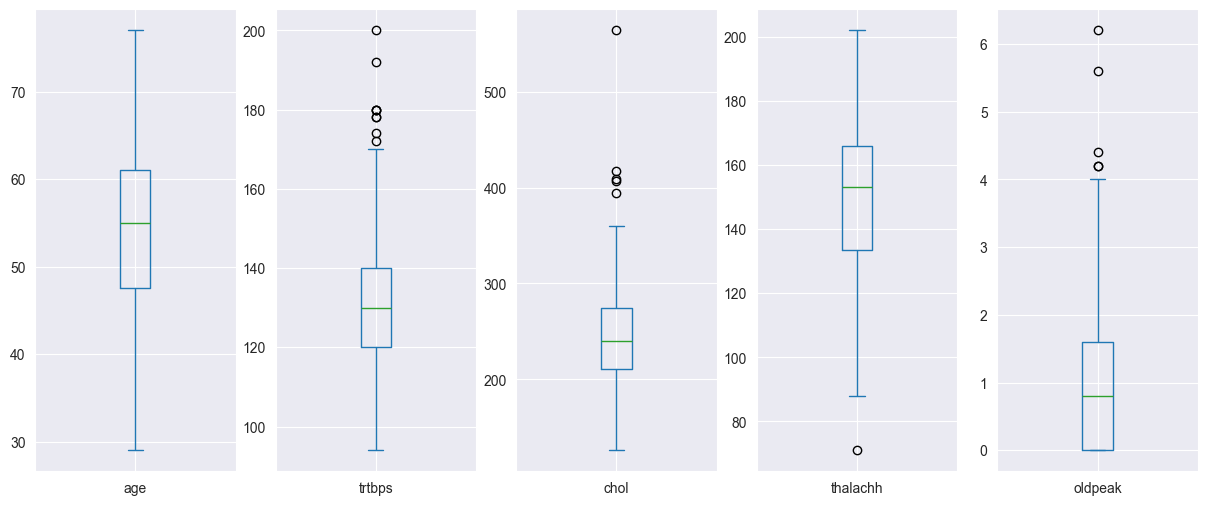

In [64]:
plot = data.plot(subplots=True, kind="box", figsize=(15, 6), column=['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'])

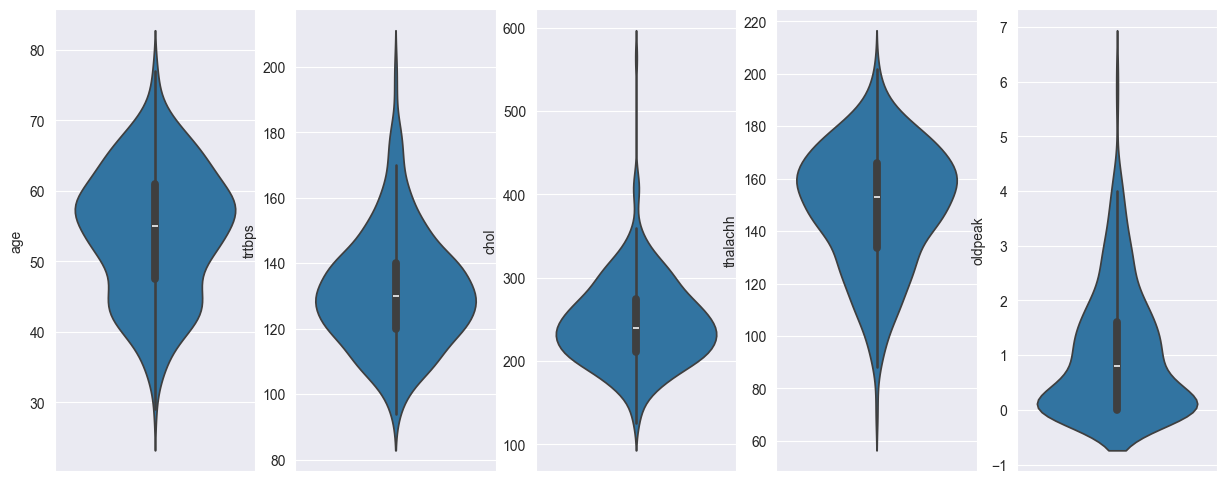

In [65]:
fig, ax = plt.subplots(1, 5)
fig.set_size_inches((15, 6))
for column, id in zip(data[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']].columns, range(0, 15)):
    sns.violinplot(ax=ax[id % 5], data=data[column])

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    float64
 13  output    303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


In [67]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


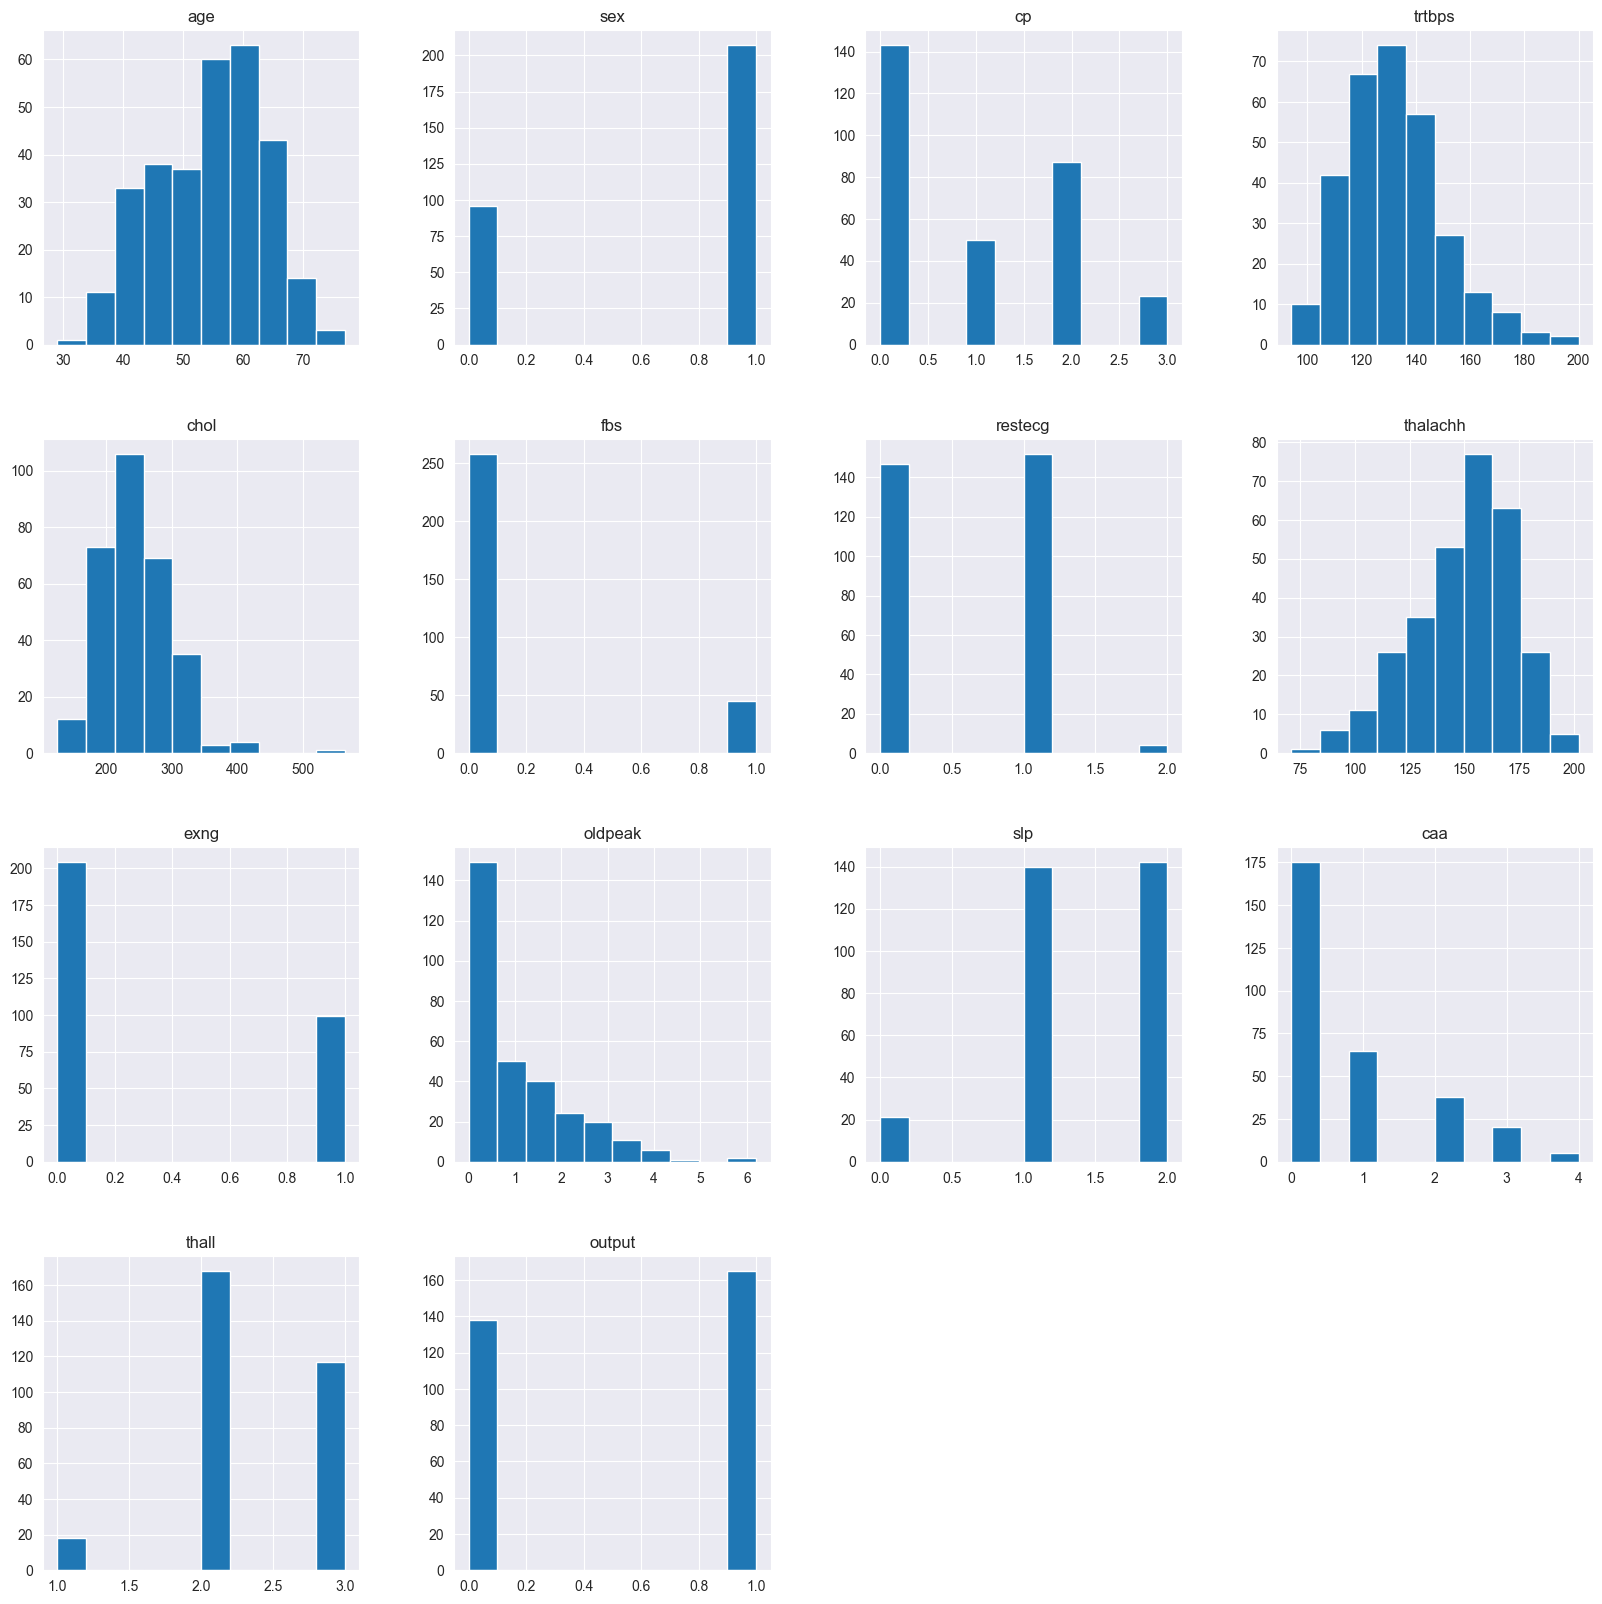

In [68]:
hist = data.hist(figsize=(20, 20))

In [69]:
categorical_cols = ['cp', 'slp', 'caa', 'thall', 'restecg']
data = pd.get_dummies(data, columns=categorical_cols, dtype=int)
data

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_0,...,caa_1,caa_2,caa_3,caa_4,thall_1.0,thall_2.0,thall_3.0,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,0,0,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1,...,0,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,0,0,0,0,0,0,1,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,0,1,0,0,0,0,1,0,1,0
301,57,1,130,131,0,115,1,1.2,0,1,...,1,0,0,0,0,0,1,0,1,0


In [70]:
y = data.output
X = data.drop('output', axis=1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [72]:
tree_pipe = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
param_grid = {'decisiontreeclassifier__max_depth': range(2, 10),
              'decisiontreeclassifier__min_samples_leaf': range(5, 30),
              'decisiontreeclassifier__min_samples_split': range(5, 30)}
tree_gs = GridSearchCV(tree_pipe, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
tree_gs.fit(X_train, y_train)
print(tree_gs.best_params_, tree_gs.best_score_, )

{'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 11, 'decisiontreeclassifier__min_samples_split': 7} 0.7997408388712737


<Axes: >

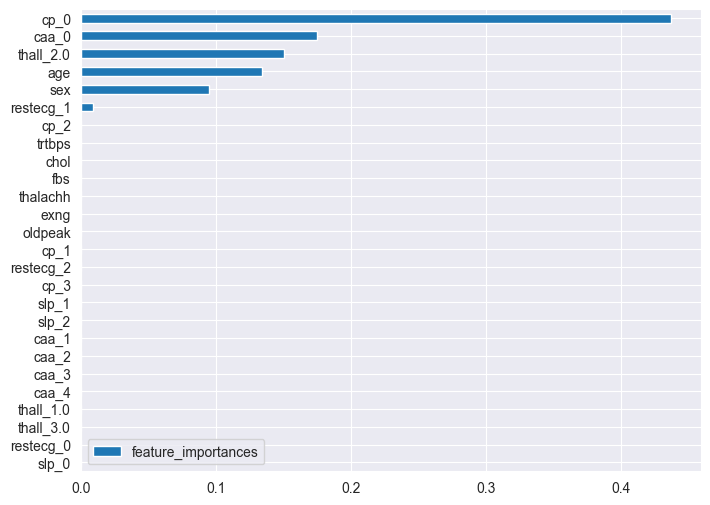

In [73]:
feature_importances = pd.DataFrame(tree_gs.best_estimator_._final_estimator.feature_importances_,
                                   columns=['feature_importances'], index=X.columns)
feature_importances.sort_values('feature_importances').plot(kind='barh', figsize=(8, 6))

In [74]:
confusion_matrix(y_test, tree_gs.best_estimator_.predict(X_test), labels=tree_gs.classes_)

array([[29, 10],
       [13, 48]], dtype=int64)

In [75]:
print(classification_report(y_test, tree_gs.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72        39
           1       0.83      0.79      0.81        61

    accuracy                           0.77       100
   macro avg       0.76      0.77      0.76       100
weighted avg       0.77      0.77      0.77       100


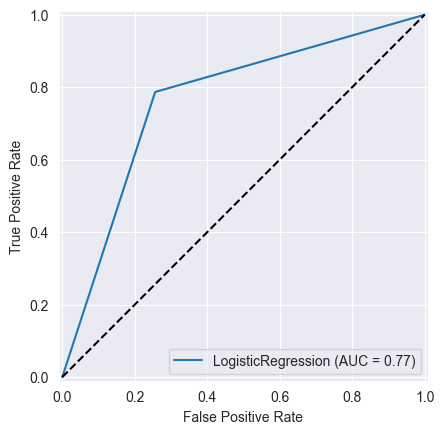

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, tree_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

Text(0.5, 0, 'Recall')

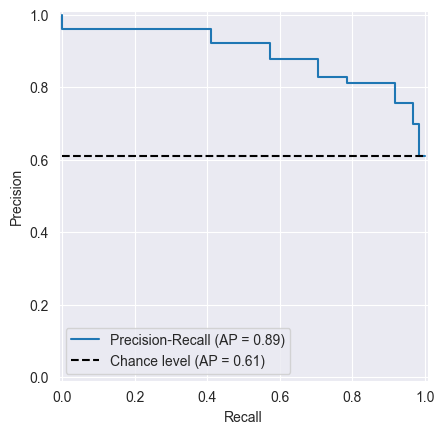

In [102]:
PrecisionRecallDisplay.from_estimator(
    tree_gs.best_estimator_, X_test, y_test, plot_chance_level=True, name='Precision-Recall')
plt.ylabel("Precision")
plt.xlabel("Recall")

<Axes: >

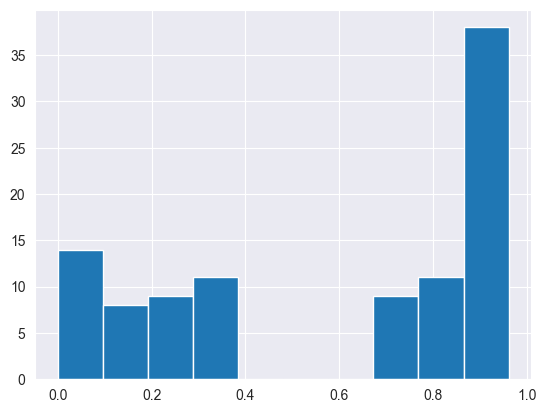

In [78]:
y_predicted_prob = tree_gs.predict_proba(X_test)
pd.Series(y_predicted_prob[:, 1]).hist()

In [79]:
forest_pipe = make_pipeline(MinMaxScaler(), RandomForestClassifier())
param_grid = {'randomforestclassifier__n_estimators': range(10, 50, 2),
              'randomforestclassifier__max_depth': range(2, 7),
              'randomforestclassifier__min_samples_leaf': range(3, 15),
              'randomforestclassifier__min_samples_split': range(3, 15)}
forest_gs = GridSearchCV(forest_pipe, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
forest_gs.fit(X_train, y_train)
print(forest_gs.best_params_, forest_gs.best_score_)

{'randomforestclassifier__max_depth': 4, 'randomforestclassifier__min_samples_leaf': 7, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__n_estimators': 20} 0.8596569449668433


<Axes: >

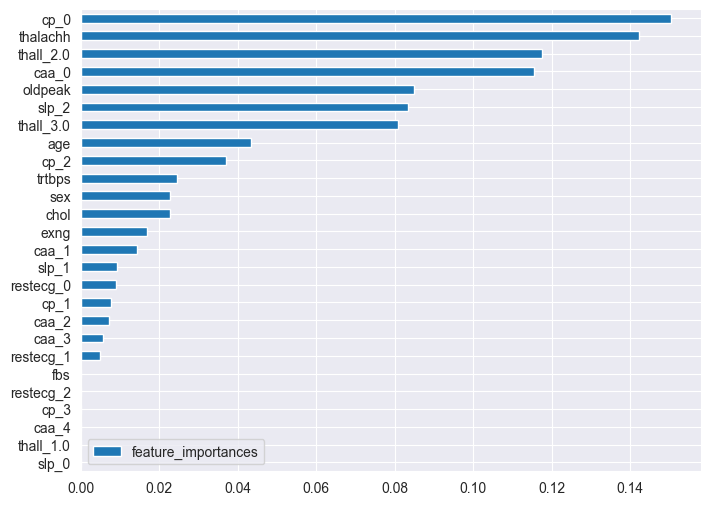

In [80]:
feature_importances = pd.DataFrame(forest_gs.best_estimator_._final_estimator.feature_importances_,
                                   columns=['feature_importances'], index=X.columns)
feature_importances.sort_values('feature_importances').plot(kind='barh', figsize=(8, 6))

In [81]:
confusion_matrix(y_test, forest_gs.best_estimator_.predict(X_test), labels=tree_gs.classes_)

array([[31,  8],
       [ 5, 56]], dtype=int64)

In [82]:
print(classification_report(y_test, forest_gs.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        39
           1       0.88      0.92      0.90        61

    accuracy                           0.87       100
   macro avg       0.87      0.86      0.86       100
weighted avg       0.87      0.87      0.87       100


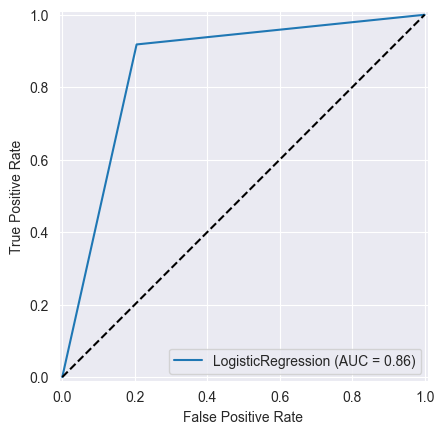

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, forest_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

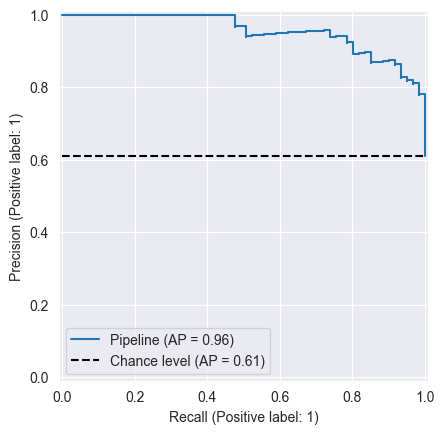

In [84]:
PrecisionRecallDisplay.from_estimator(forest_gs.best_estimator_,
                                      X_test, y_test, plot_chance_level=True)
plt.ylabel("Precision")
plt.xlabel("Recall")

<Axes: >

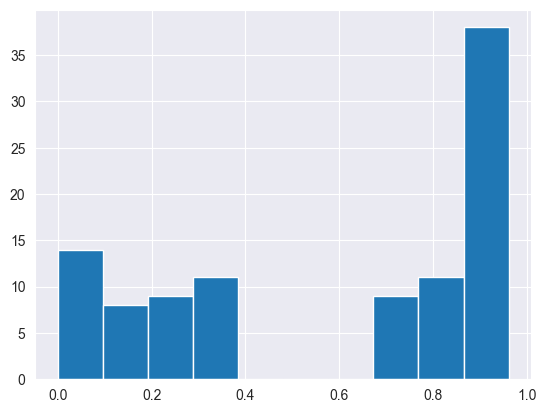

In [85]:
y_predicted_prob = tree_gs.predict_proba(X_test)
pd.Series(y_predicted_prob[:, 1]).hist()

In [86]:
knn_pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': range(1, 50)}
knn_gs = GridSearchCV(knn_pipe, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
knn_gs.fit(X_train, y_train)

print(knn_gs.best_params_, knn_gs.best_score_)

{'kneighborsclassifier__n_neighbors': 27} 0.8528178003147403


In [87]:
confusion_matrix(y_test, knn_gs.best_estimator_.predict(X_test), labels=tree_gs.classes_)

array([[33,  6],
       [ 9, 52]], dtype=int64)

In [88]:
print(classification_report(y_test, knn_gs.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.90      0.85      0.87        61

    accuracy                           0.85       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.85      0.85      0.85       100


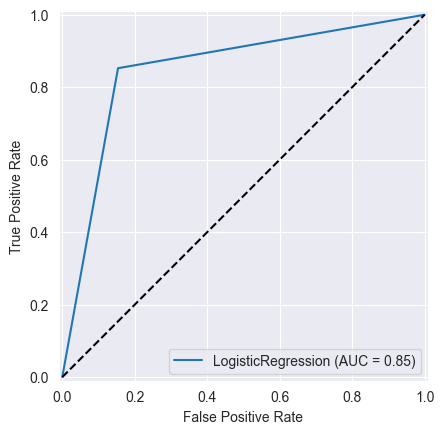

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, knn_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

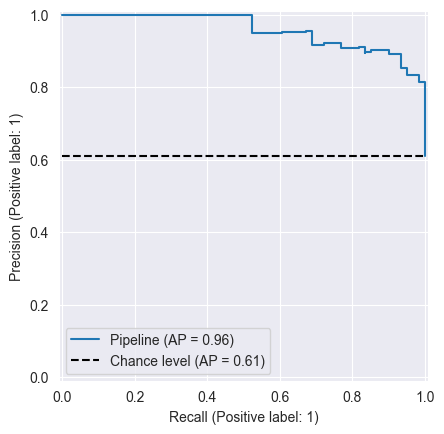

In [90]:
PrecisionRecallDisplay.from_estimator(knn_gs.best_estimator_,
                                      X_test, y_test, plot_chance_level=True)
plt.ylabel("Precision")
plt.xlabel("Recall")

<Axes: >

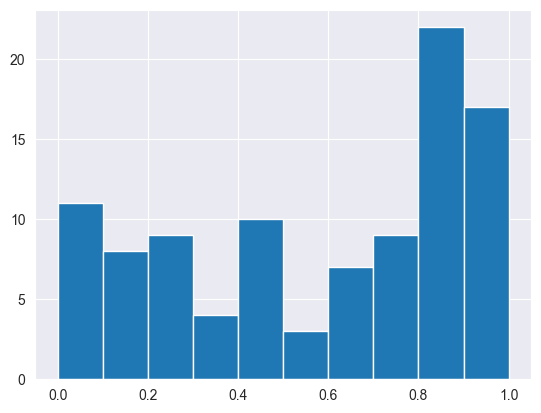

In [91]:
y_predicted_prob = knn_gs.predict_proba(X_test)
pd.Series(y_predicted_prob[:, 1]).hist()

In [92]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

logistic_pipe = Pipeline(
    steps=[('pf', PolynomialFeatures(interaction_only=False, include_bias=False)),
           ('ss', StandardScaler()),
           ('lr', LogisticRegression())])

param_grid = {"pf__degree": [2],
              "lr__C": np.logspace(-5, 5, 10),
              "lr__penalty": [None, 'l1', "l2", "elasticnet"],
              "lr__solver": ["saga"],
              "lr__l1_ratio": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1], }
logistic_gs = GridSearchCV(logistic_pipe, param_grid=param_grid, cv=6, n_jobs=1, scoring='f1', verbose=3)
logistic_gs.fit(X_train, y_train)

Fitting 6 folds for each of 360 candidates, totalling 2160 fits
[CV 1/6] END lr__C=1e-05, lr__l1_ratio=0.1, lr__penalty=None, lr__solver=saga, pf__degree=2;, score=0.842 total time=   0.0s
[CV 2/6] END lr__C=1e-05, lr__l1_ratio=0.1, lr__penalty=None, lr__solver=saga, pf__degree=2;, score=0.688 total time=   0.0s
[CV 3/6] END lr__C=1e-05, lr__l1_ratio=0.1, lr__penalty=None, lr__solver=saga, pf__degree=2;, score=0.800 total time=   0.0s
[CV 4/6] END lr__C=1e-05, lr__l1_ratio=0.1, lr__penalty=None, lr__solver=saga, pf__degree=2;, score=0.765 total time=   0.0s
[CV 5/6] END lr__C=1e-05, lr__l1_ratio=0.1, lr__penalty=None, lr__solver=saga, pf__degree=2;, score=0.833 total time=   0.0s
[CV 6/6] END lr__C=1e-05, lr__l1_ratio=0.1, lr__penalty=None, lr__solver=saga, pf__degree=2;, score=0.765 total time=   0.0s
[CV 1/6] END lr__C=1e-05, lr__l1_ratio=0.1, lr__penalty=l1, lr__solver=saga, pf__degree=2;, score=0.000 total time=   0.0s
[CV 2/6] END lr__C=1e-05, lr__l1_ratio=0.1, lr__penalty=l1, lr_

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('pf',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             n_jobs=1,
             param_grid={'lr__C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'lr__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 1],
                         'lr__penalty': [None, 'l1', 'l2', 'elasticnet'],
                         'lr__solver': ['saga'], 'pf__degree': [2]},
             scoring='f1', verbose=3)

In [93]:
logistic_gs.best_params_, logistic_gs.best_score_

({'lr__C': 0.021544346900318846,
  'lr__l1_ratio': 0.2,
  'lr__penalty': 'elasticnet',
  'lr__solver': 'saga',
  'pf__degree': 2},
 0.8544704958211149)

In [94]:
logistic_pipe.named_steps

{'pf': PolynomialFeatures(include_bias=False),
 'ss': StandardScaler(),
 'lr': LogisticRegression()}

In [95]:
logistic_gs.best_estimator_.named_steps['lr'].coef_

array([[ 0.        , -0.00255992,  0.        ,  0.        ,  0.        ,
         0.07541882, -0.00660278, -0.01482486, -0.05885547,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.07826189,  0.        , -0.00209408,  0.        ,  0.        ,
         0.        ,  0.05516131, -0.01376559,  0.        ,  0.        ,
         0.        ,  0.        , -0.04711077,  0.        ,  0.        ,
         0.        ,  0.        , -0.01484067, -0.02393399, -0.05168045,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.05625024,  0.        , -0.00132252,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.00255992, -0.00481547, -0.05662251,
         0.        ,  0.        ,  0.        ,  0.        , -0.03507191,
         0.        ,  0.        ,  0.        ,  0.        , -0.02731393,
         0.        ,  0.        , -0.0392514 , -0.0

In [96]:
logistic_gs.best_estimator_.named_steps['pf'].powers_

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 2]], dtype=int64)

In [97]:
confusion_matrix(y_test, logistic_gs.best_estimator_.predict(X_test), labels=logistic_gs.classes_)

array([[30,  9],
       [ 7, 54]], dtype=int64)

In [98]:
print(classification_report(y_test, logistic_gs.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        39
           1       0.86      0.89      0.87        61

    accuracy                           0.84       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100


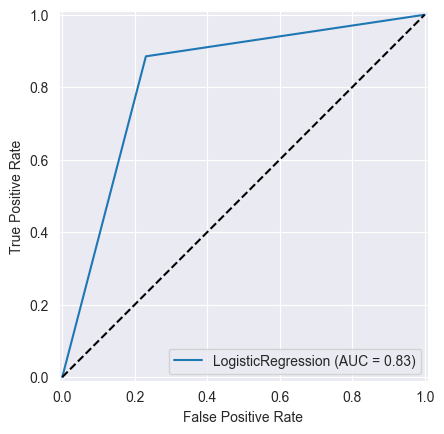

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, logistic_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

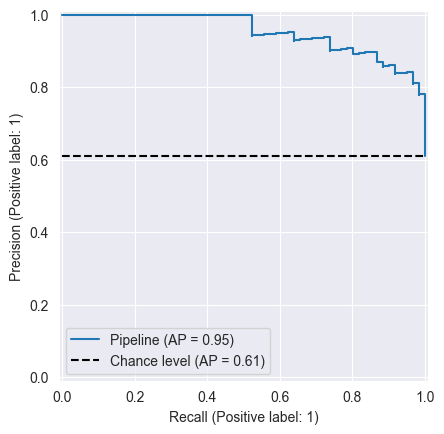

In [100]:
PrecisionRecallDisplay.from_estimator(logistic_gs.best_estimator_,
                                      X_test, y_test, plot_chance_level=True)
plt.ylabel("Precision")
plt.xlabel("Recall")

<Axes: >

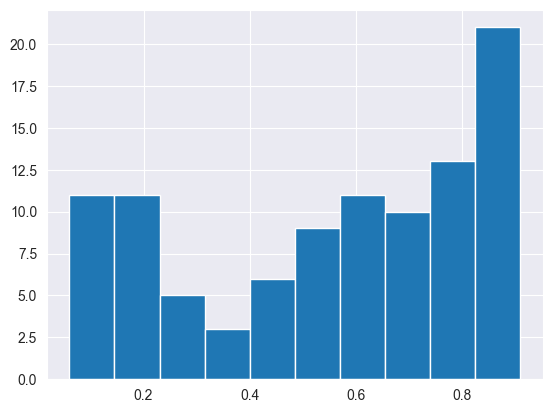

In [101]:
y_predicted_prob = logistic_gs.predict_proba(X_test)
pd.Series(y_predicted_prob[:, 1]).hist()

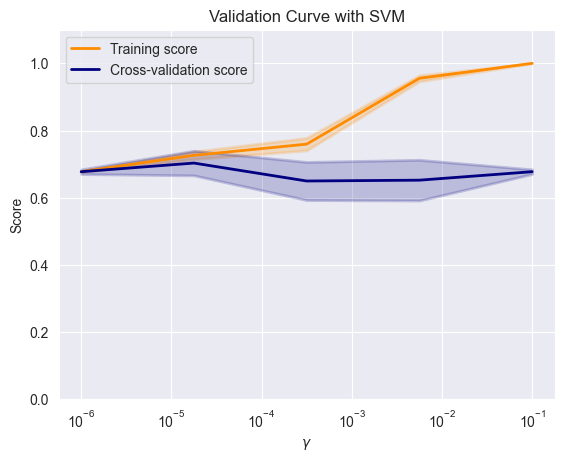

In [106]:
train_scores, test_scores = validation_curve(
    SVC(),
    X_train,
    y_train,
    param_name="gamma",
    param_range=np.logspace(-6, -1, 5),
    scoring="f1",
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    np.logspace(-6, -1, 5), train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    np.logspace(-6, -1, 5),
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    np.logspace(-6, -1, 5), test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    np.logspace(-6, -1, 5),
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

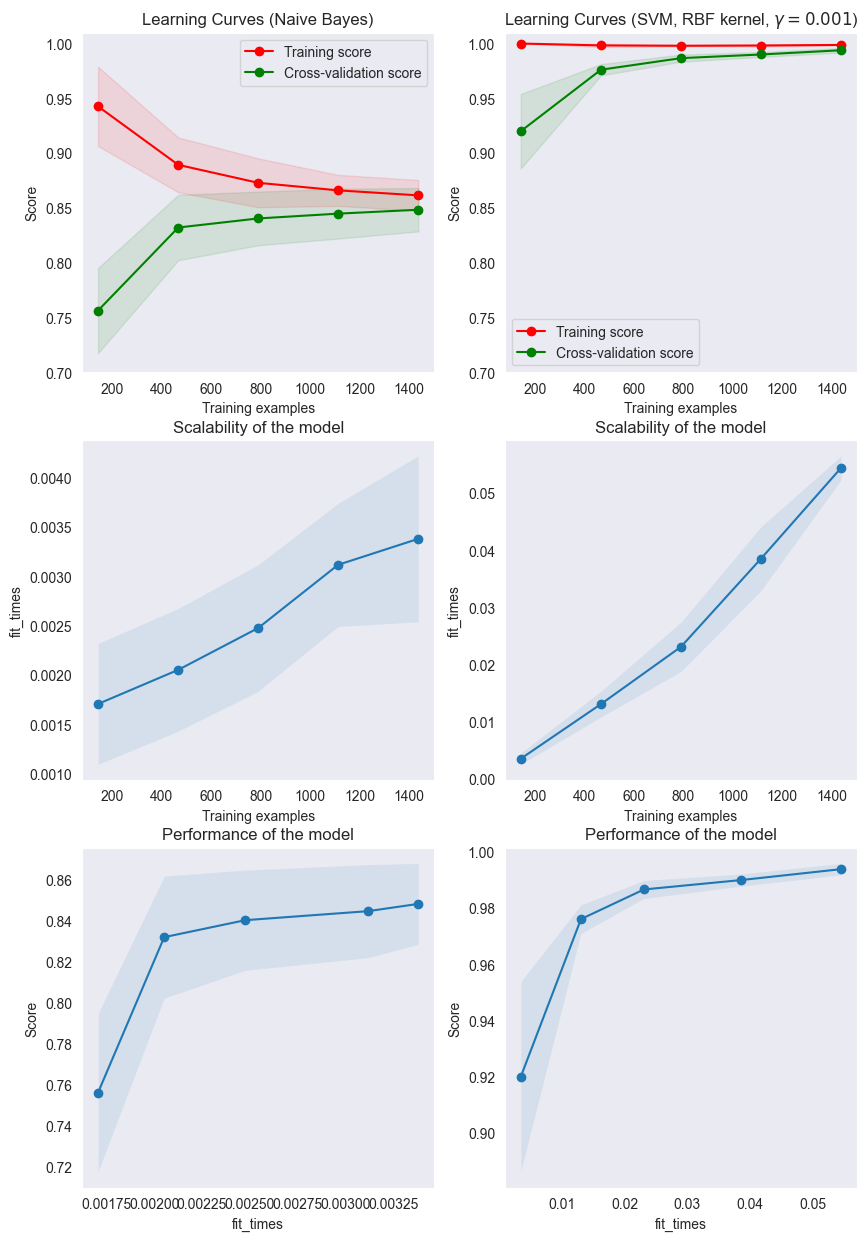

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Построение графика кривой обучения
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Постройте график n_samples против fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Постройте график зависимости времени соответствия_времени от оценки
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Перекрестная проверка с 50 итерациями для более плавного среднего теста и обучения
# кривых оценки, каждый раз с 20% данных, случайно выбранных в качестве набора для проверки.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC дороже, поэтому мы делаем меньше итераций CV:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()